In [2]:
import pandas as pd

In [3]:
#reading csv file
df=pd.read_csv(r"C:\Users\navit\Downloads\Bank (1)")

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
#categorical and numerical data
import numpy as np
categorical_data=df.select_dtypes(include=[object]).columns
numerical_cols=df.select_dtypes(include=np.number).columns.tolist()

print("categorical datas:",categorical_data)

print("numerical datas:",numerical_cols)

categorical datas: Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')
numerical datas: ['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [6]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_data:
    df[col] = LabelEncoder().fit_transform(df[col])
df[categorical_data]

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,11,12,128,1,1,2,0
1,11,12,128,1,1,3,0
2,11,12,128,1,1,4,0
3,11,12,128,1,1,5,0
4,11,12,128,1,1,1,0
...,...,...,...,...,...,...,...
99995,6508,9,683,1,1,0,1
99996,6508,9,683,1,1,1,1
99997,6508,9,683,1,1,0,1
99998,6508,9,683,1,1,3,2


In [7]:
X = df.drop('Credit_Score', axis=1)  # Features (all columns except Credit_Score)
y = df['Credit_Score'] 

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class classification:

    def __init__(self, x, y):
        # List of classification models to be evaluated
        self.models = [
            ('AdaBoostClassifier', AdaBoostClassifier()),
            ('RandomForestClassifier', RandomForestClassifier()),
            ('GradientBoostingClassifier', GradientBoostingClassifier()),
            ('HistGradientBoostingClassifier', HistGradientBoostingClassifier()),
            ('DecisionTreeClassifier', DecisionTreeClassifier()),
            ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
            ('LogisticRegression', LogisticRegression(max_iter=1000))
           
      
        ]
        
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)

            data = {
                'Model_Name': model_name,
                'Train_Accuracy': round(accuracy_score(self.y_train, y_train_pred), 4),
                'Test_Accuracy': round(accuracy_score(self.y_test, y_test_pred), 4),
                'Train_Precision': round(precision_score(self.y_train, y_train_pred, average='weighted', zero_division=1), 4),
                'Test_Precision': round(precision_score(self.y_test, y_test_pred, average='weighted', zero_division=1), 4),
                'Train_Recall': round(recall_score(self.y_train, y_train_pred, average='weighted', zero_division=1), 4),
                'Test_Recall': round(recall_score(self.y_test, y_test_pred, average='weighted', zero_division=1), 4),
                'Train_F1_Score': round(f1_score(self.y_train, y_train_pred, average='weighted', zero_division=1), 4),
                'Test_F1_Score': round(f1_score(self.y_test, y_test_pred, average='weighted', zero_division=1), 4)
            }

            result.append(data)

        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

    def plot_metrics(self):
        # Plotting accuracy, precision, recall, and F1 score
        metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1_Score']
        fig, ax = plt.subplots(2, 2, figsize=(14, 10))
        
        
        for i, metric in enumerate(metrics):
            sns.barplot(x='Model_Name', y=metric, data=self.model_score_df, ax=ax[i//2, i%2], palette="Blues_d")
            ax[i//2, i%2].set_title(f'{metric} Comparison')
            ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45, horizontalalignment='right')


        plt.tight_layout()
        plt.show()



In [9]:
classifier = classification(X, y)  # x: features, y: target
report_df = classifier.all_model()
print(report_df)

(80000, 28) (20000, 28) (80000,) (20000,)


C:\Users\navit\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(

KeyboardInterrupt



In [ ]:
classifier.plot_metrics()

In [10]:
#reading csv file
df=pd.read_csv(r"D:\youtube project\Bank_preprocessed")

In [11]:
df

,Unnamed: 0,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,2,809.98,26.822620,265.0,0,49.574949,21.465380,3,312.494089,Good
1,1,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,2,809.98,31.944960,266.0,0,49.574949,21.465380,2,284.629162,Good
2,2,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,2,809.98,28.609352,267.0,0,49.574949,21.465380,1,331.209863,Good
3,3,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,2,809.98,31.377862,268.0,0,49.574949,21.465380,0,223.451310,Good
4,4,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,2,809.98,24.797347,269.0,0,49.574949,21.465380,4,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,2,502.38,34.663572,378.0,0,35.104023,24.028477,5,479.866228,Poor
99996,99996,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,2,502.38,40.565631,379.0,0,35.104023,24.028477,4,496.651610,Poor
99997,99997,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,...,2,502.38,41.255522,380.0,0,35.104023,24.028477,5,516.809083,Poor
99998,99998,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,2,502.38,33.638208,381.0,0,35.104023,24.028477,2,319.164979,Standard


In [12]:
x = df.drop('Credit_Score',axis=1)
x

,Unnamed: 0,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,2,809.98,26.822620,265.0,0,49.574949,21.465380,3,312.494089
1,1,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,2,809.98,31.944960,266.0,0,49.574949,21.465380,2,284.629162
2,2,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,2,809.98,28.609352,267.0,0,49.574949,21.465380,1,331.209863
3,3,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,4.0,2,809.98,31.377862,268.0,0,49.574949,21.465380,0,223.451310
4,4,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,4.0,2,809.98,24.797347,269.0,0,49.574949,21.465380,4,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,3.0,2,502.38,34.663572,378.0,0,35.104023,24.028477,5,479.866228
99996,99996,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,3.0,2,502.38,40.565631,379.0,0,35.104023,24.028477,4,496.651610
99997,99997,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,...,3.0,2,502.38,41.255522,380.0,0,35.104023,24.028477,5,516.809083
99998,99998,25.0,10,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,3.0,2,502.38,33.638208,381.0,0,35.104023,24.028477,2,319.164979


In [13]:
y = df['Credit_Score']
y

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
scaled_class = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled_class, columns=x.columns)
x_scaled.head().T

,0,1,2,3,4
Unnamed: 0,-1.732033,-1.731999,-1.731964,-1.731930,-1.731895
Age,-0.958344,-0.958344,-0.958344,-0.958344,-0.958344
Occupation,-1.606054,-1.606054,-1.606054,-1.606054,-1.606054
Annual_Income,-0.831416,-0.831416,-0.831416,-0.831416,-0.831416
Monthly_Inhand_Salary,-0.754806,-0.754806,-0.754806,-0.754806,-0.754806
Num_Bank_Accounts,-0.913438,-0.913438,-0.913438,-0.913438,-0.913438
Num_Credit_Card,-0.741899,-0.741899,-0.741899,-0.741899,-0.741899
Interest_Rate,-1.319266,-1.319266,-1.319266,-1.319266,-1.319266
Num_of_Loan,0.190946,0.190946,0.190946,0.190946,0.190946
Delay_from_due_date,-1.244692,-1.244692,-1.244692,-1.105761,-1.036295


Accuracy: 0.755
              precision    recall  f1-score   support

        Good       0.71      0.70      0.71      3527
        Poor       0.74      0.73      0.74      5874
    Standard       0.77      0.79      0.78     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.75      0.76      0.75     20000



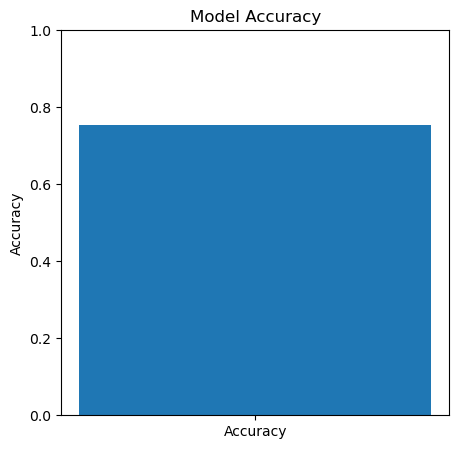

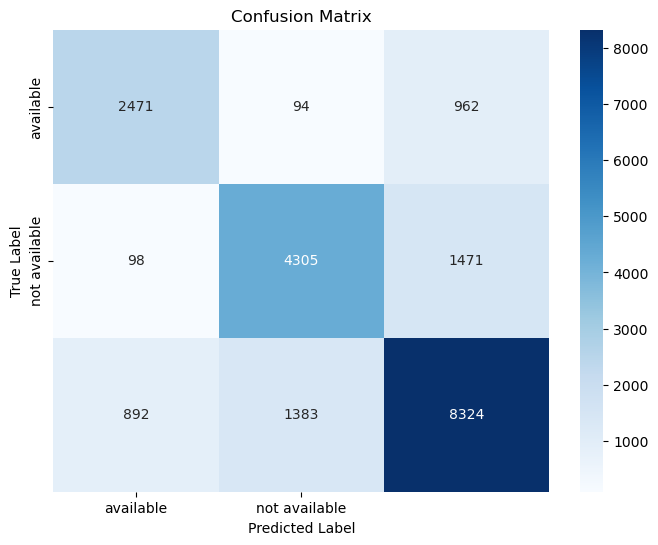

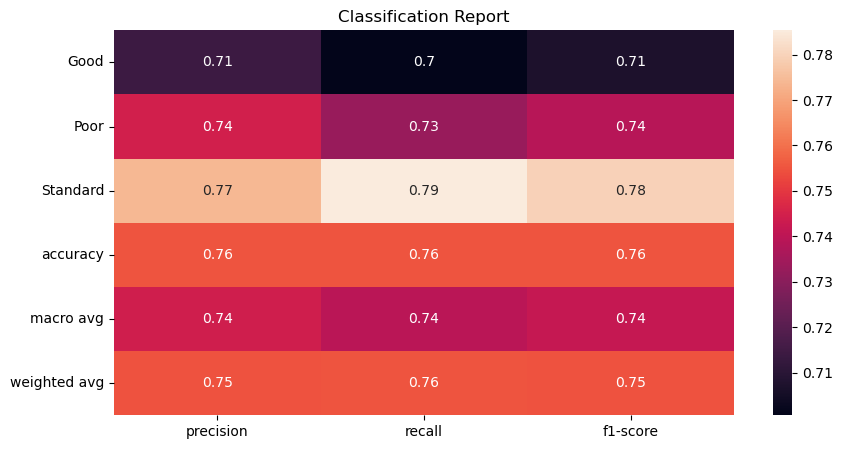

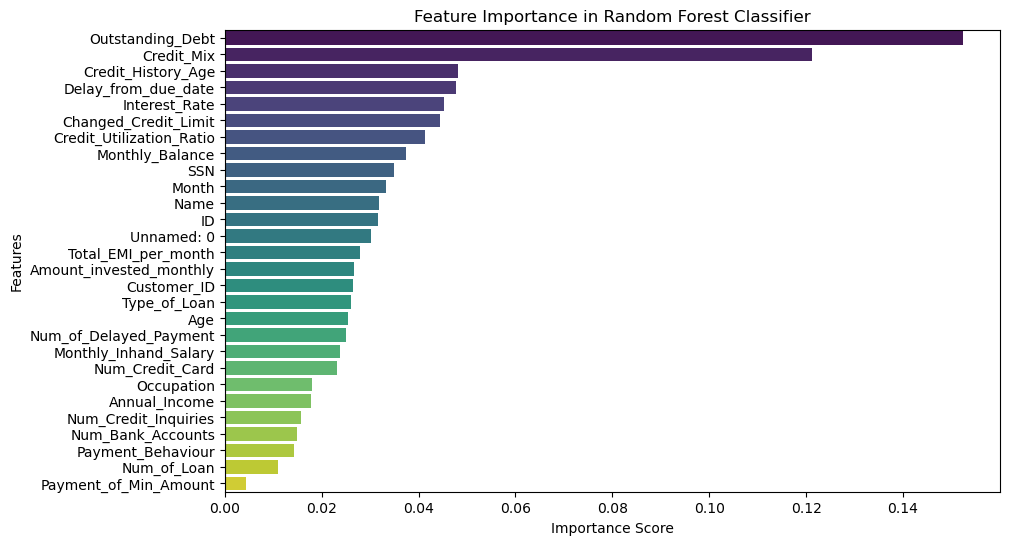

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train = df[['Age', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
              'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
              'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 
              'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 
              'Changed_Credit_Limit', 'Outstanding_Debt']]  # Select only these 16 features
y_train = df['Credit_Score'] 

#X = df1.drop(columns=['Credit_Score'])  # All columns except the target
#y = df1['Credit_Score']  # The target column
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

 #1. Accuracy Plot
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['available', 'not available'], yticklabels=['available', 'not available'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()

# Feature Importance Visualization
importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')
plt.show()


Accuracy: 0.80115
              precision    recall  f1-score   support

        Good       0.77      0.75      0.76      3527
        Poor       0.79      0.82      0.80      5874
    Standard       0.82      0.81      0.81     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



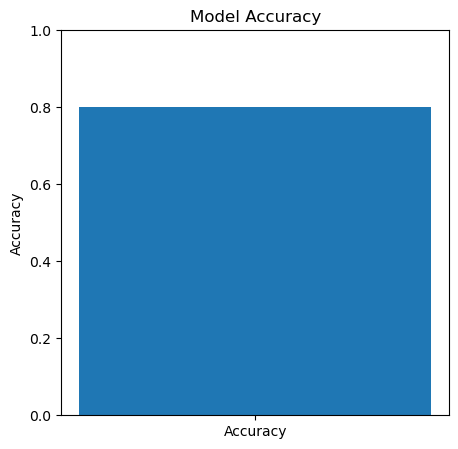

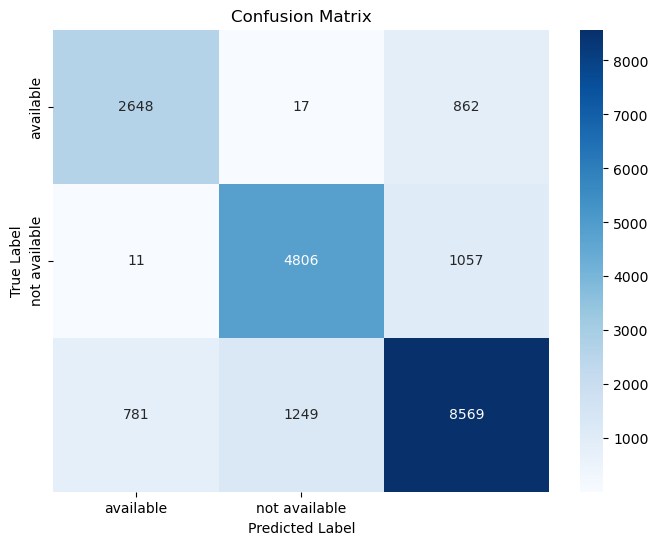

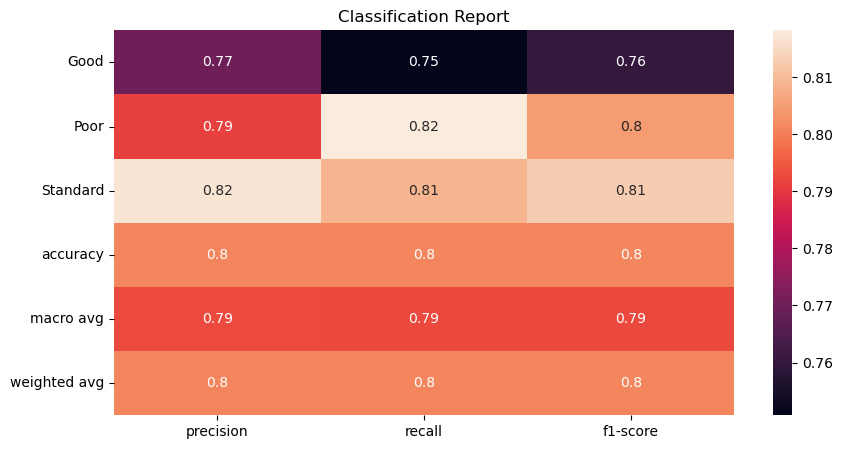

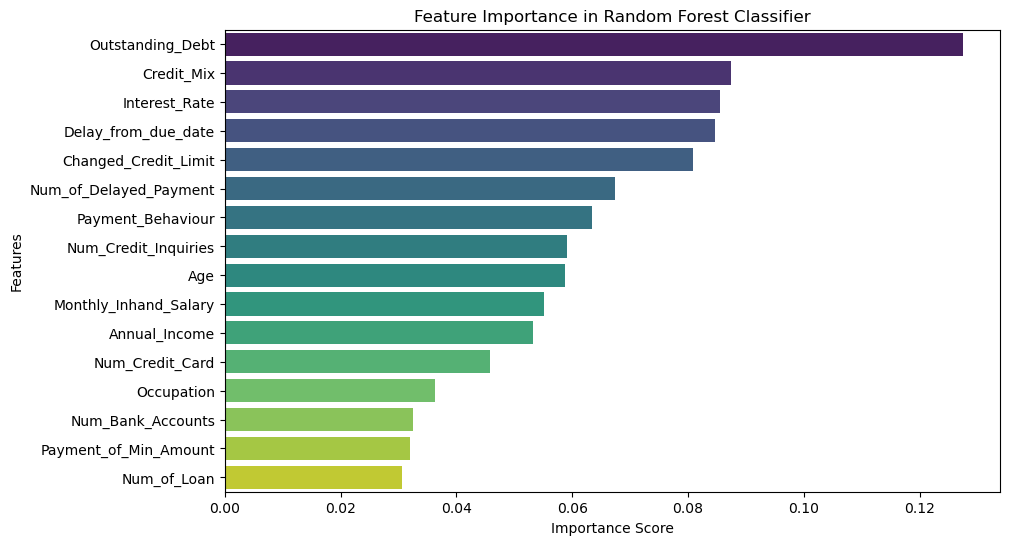

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from joblib import dump

X = df[['Age', 'Occupation', 'Num_Bank_Accounts',
         'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
         'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 
         'Payment_of_Min_Amount', 'Payment_Behaviour','Annual_Income',
         'Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit', 
         'Outstanding_Debt']]
y = df['Credit_Score']

#X = df1.drop(columns=['Credit_Score'])  # All columns except the target
#y = df1['Credit_Score']  # The target column
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

 #1. Accuracy Plot
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['available', 'not available'], yticklabels=['available', 'not available'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()

# Feature Importance Visualization
importance = model1.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
X['Occupation'] = label_encoder.fit_transform(X['Occupation'])  # Encoding 'Occupation'

# Select features and target
X_train = df[['Age', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
              'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
              'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 
              'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 
              'Changed_Credit_Limit', 'Outstanding_Debt']]  # Select only these 16 features
y_train = df['Credit_Score'] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Train Random Forest Classifier with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with tuned hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Print evaluation metrics
print("Improved Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Cross-validation score
cross_val = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(cross_val))

# 1. Accuracy Plot
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy after Hyperparameter Tuning')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Average', 'Poor'], yticklabels=['Good', 'Average', 'Poor'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
plt.figure


C:\Users\navit\AppData\Local\Temp\ipykernel_6120\987594824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Occupation'] = label_encoder.fit_transform(X['Occupation'])  # Encoding 'Occupation'


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [36]:
from joblib import dump

In [37]:
dump(scaler,'final_class_pre.joblib')
dump(model1,'final_class_pre.joblib')

['final_class_pre.joblib']